<h2><center>THE CHINESE UNIVERSITY OF HONG KONG<br /> 
    Department of Mathematics<br />
 MATH4280<br />
    Innovation and Design in Big Data Analytics</center></h2>

# LAB ASSIGNMENT ACTIVITY 6

## Question 1

Enter

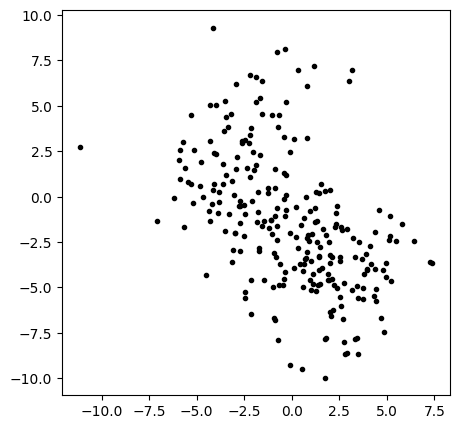

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline
np.random.seed(1200)

cluster_num = 5
original_centroids = {
    i+1: [np.random.randint(-5,5), np.random.randint(-5,5)]
    for i in range(cluster_num)
}
df = pd.DataFrame({
    'x': np.array([np.random.randn(50)*2+ original_centroids[i][0] for i in original_centroids.keys()]).flatten(),
    'y': np.array([np.random.randn(50)*2+ original_centroids[i][1] for i in original_centroids.keys()]).flatten(),
})

k = cluster_num
fig = plt.figure(figsize=(5, 5))
plt.scatter(df['x'], df['y'], color='k',marker='.')
for i in original_centroids.keys():
    plt.scatter(*original_centroids[i],marker='')

plt.show()

We generated $250$ points with generic centroids stored as `original_centroids`. 

## Q1a

Use the K-Means clustering algorithm to compute the cluster centroids. 

In [2]:
## answer of q1a


def update(k):
    """
    Updates the centroids based on the mean coordinates of data points assigned to each centroid.

    Parameters:
    k (int): Number of centroids.

    Returns:
    int: Updated number of centroids after the centroids have been recalculated.
    """
    for i in centroids.keys():
        # Compute the mean x-coordinate for data points assigned to the current centroid 'i'
        centroids[i][0] = np.mean(df[df["closest"] == i]["x"])
        # Compute the mean y-coordinate for data points assigned to the current centroid 'i'
        centroids[i][1] = np.mean(df[df["closest"] == i]["y"])
    # The updated centroids are stored in the 'centroids' dictionary.
    # The updated value of 'k' (number of centroids) is returned.
    return k


def assignment(df, centroids):
    """
    Assigns data points in the input dataframe to the nearest centroid based on Euclidean distance.

    Parameters:
        df (pd.DataFrame): Input dataframe containing 'x' and 'y' columns representing coordinates of data points.
        centroids (dict): Dictionary containing centroid labels as keys and corresponding (x, y) coordinates as values.

    Returns:
        pd.DataFrame: Updated dataframe with additional columns indicating distances from each centroid, closest centroid label,
                      and assigned color for each data point.
    """

    # Iterate through each centroid
    for i in centroids.keys():
        # Calculate Euclidean distance from the current centroid to all data points
        df["distance_from_{}".format(i)] = np.sqrt(
            (df["x"] - centroids[i][0]) ** 2 + (df["y"] - centroids[i][1]) ** 2
        )

    # List of column names representing distances from each centroid
    centroid_distance_cols = ["distance_from_{}".format(i) for i in centroids.keys()]

    # Find the closest centroid for each data point by locating the minimum distance column name
    df["closest"] = df.loc[:, centroid_distance_cols].idxmin(axis=1)

    # Strip the column name to extract the centroid number, converting it to an integer
    df["closest"] = df["closest"].map(lambda x: int(x.lstrip("distance_from_")))

    # Return the updated dataframe with additional columns indicating assignments
    return df


"""
Setting up some random centroids in the beginning.
"""

np.random.seed(200)
k = 3
# centroids[i] = [x, y]
centroids = {
    i + 1: [np.random.randint(-5, 5), np.random.randint(-5, 5)] for i in range(k)
}

print(centroids)

df = assignment(df, centroids)

"""
Import copy, keep record of the original centroids. 
"""
import copy

# deepcopy() is used to create a new copy of the dictionary,
old_centroids = copy.deepcopy(centroids)

"""
Try 1 time
"""
centroids = update(centroids)

df = assignment(df, centroids)


"""
Setting up a while loop to make it run indefinitely until the centroids don't change any more.
"""


while True:
    closest_centroids = df["closest"].copy(
        deep=True
    )  # this columns of data only used for comparison.
    centroids = update(centroids)
    df = assignment(df, centroids)
    if closest_centroids.equals(df["closest"]):
        break


print(centroids)
print(df.head())

{1: [4, -5], 2: [-1, 2], 3: [4, 4]}
{1: [2.08509580213515, -4.100297359695721], 2: [-2.813285966876451, -0.16462691183577602], 3: [-1.6468669004895056, 4.836805158296741]}
          x         y  distance_from_1  distance_from_2  distance_from_3  \
0 -3.205120  4.538583        10.129987         4.719504         1.586534   
1 -1.896710  6.564627        11.383997         6.791389         1.745792   
2 -0.413655  3.282776         7.794455         4.200335         1.983890   
3  3.153351  6.966588        11.118323         9.298117         5.251482   
4 -0.370206  8.118629        12.463172         8.636027         3.521396   

   closest  
0        3  
1        3  
2        3  
3        3  
4        3  


## Q1b

Plot the original centers black and the obtained centroids red on the same graph.

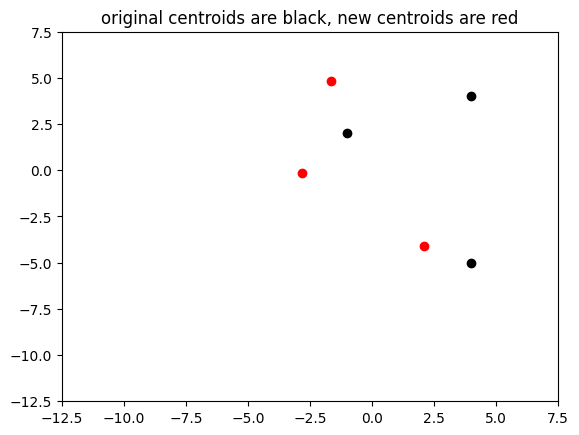

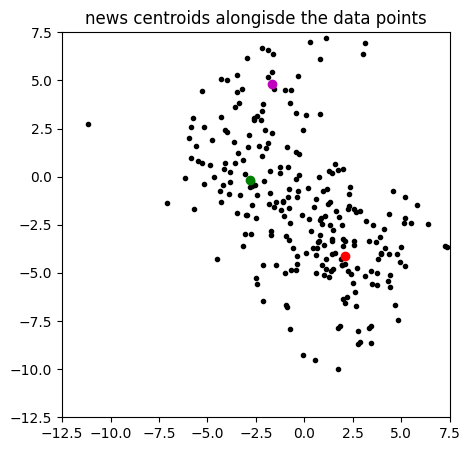

In [3]:
## answer of q1b

for i in old_centroids.keys():
    plt.scatter(*old_centroids[i], color="k")

for i in centroids.keys():
    plt.scatter(*centroids[i], color="r")


plt.xlim(-12.5, 7.5)
plt.ylim(-12.5, 7.5)
plt.title("original centroids are black, new centroids are red")
plt.show()


colmap = {1: "r", 2: "g", 3: "m"}
df["color"] = df["closest"].map(lambda x: colmap[x])

fig = plt.figure(figsize=(5, 5))
plt.scatter(df["x"], df["y"], color="k", marker=".")

# Here we use colormap to plot the centroids
for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])


plt.xlim(-12.5, 7.5)
plt.ylim(-12.5, 7.5)
plt.title("news centroids alongisde the data points")
plt.show()

## Question 2

## Q2a

Enter

In [4]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("stock_prices.csv")
data.set_index("Date", inplace=True)
tickers = ["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "BRK-B", "V", "JNJ", "JPM"]

print(data.head())

                  AAPL        AMZN       BRK-B       GOOGL         JNJ  \
Date                                                                     
2023-05-25  172.990005  115.000000  319.019989  123.480003  154.410004   
2023-05-26  175.429993  120.110001  320.600006  124.610001  154.350006   
2023-05-30  177.300003  121.660004  322.190002  123.669998  154.369995   
2023-05-31  177.250000  120.580002  321.079987  122.870003  155.059998   
2023-06-01  180.089996  122.769997  323.119995  123.720001  154.539993   

                   JPM        MSFT        TSLA           V  
Date                                                        
2023-05-25  135.669998  325.920013  184.470001  223.380005  
2023-05-26  136.940002  332.890015  193.169998  225.009995  
2023-05-30  137.460007  331.209991  201.160004  221.639999  
2023-05-31  135.710007  328.390015  203.929993  221.029999  
2023-06-01  137.580002  332.579987  207.520004  226.500000  


`data` is a dataframe of stock prices of the previous 100 trading days of 9 stocks. 

Compute their respective means, standard deviations and skewness using `df.mean()`, `df.std()` and `df.skew()`.  

Store your results to a `9`-by-`3` array called `stats`.

In [5]:
## answer of Q2a

# get mean of each column
mean = data.mean(axis=0)
print(mean)

# get standard deviation of each column
std = data.std(axis=0)
print(std)

# get skew of each column
skew = data.skew(axis=0)
print(skew)

cols = data.columns
print(cols)

AAPL     182.509501
AMZN     131.238601
BRK-B    348.205399
GOOGL    128.642200
JNJ      162.899800
JPM      146.921800
MSFT     330.791901
TSLA     252.186700
V        236.320400
dtype: float64
AAPL      7.143584
AMZN      5.755626
BRK-B    11.963140
GOOGL     6.386018
JNJ       5.689242
JPM       5.660373
MSFT      9.254528
TSLA     20.523742
V         7.135801
dtype: float64
AAPL     0.354083
AMZN     0.156242
BRK-B   -0.248554
GOOGL    0.007088
JNJ      0.543043
JPM      0.262669
MSFT     0.339043
TSLA    -0.892726
V       -0.411277
dtype: float64
Index(['AAPL', 'AMZN', 'BRK-B', 'GOOGL', 'JNJ', 'JPM', 'MSFT', 'TSLA', 'V'], dtype='object')


In [6]:
# join the three series into a dataframe

df = pd.concat([mean, std, skew], axis=1)
df.columns = ["mean", "std", "skew"]

stats = df
print(stats)


             mean        std      skew
AAPL   182.509501   7.143584  0.354083
AMZN   131.238601   5.755626  0.156242
BRK-B  348.205399  11.963140 -0.248554
GOOGL  128.642200   6.386018  0.007088
JNJ    162.899800   5.689242  0.543043
JPM    146.921800   5.660373  0.262669
MSFT   330.791901   9.254528  0.339043
TSLA   252.186700  20.523742 -0.892726
V      236.320400   7.135801 -0.411277


## Q2b

Create a dendrogram using the `ward` method on `stats`. This should apply clustering algorithm on the `9` classes. 

Be sure to normalize each feature before the algorithm.

In [7]:
# normalize the data
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        result[feature_name] = (
            df[feature_name] - df[feature_name].min()
        ) / (df[feature_name].max() - df[feature_name].min())
    return result

norm_stats = normalize(stats)

print(norm_stats)

           mean       std      skew
AAPL   0.245338  0.099790  0.868391
AMZN   0.011825  0.006409  0.730597
BRK-B  1.000000  0.424047  0.448660
GOOGL  0.000000  0.048821  0.626712
JNJ    0.156026  0.001942  1.000000
JPM    0.083254  0.000000  0.804722
MSFT   0.920690  0.241813  0.857916
TSLA   0.562683  1.000000  0.000000
V      0.490420  0.099266  0.335325


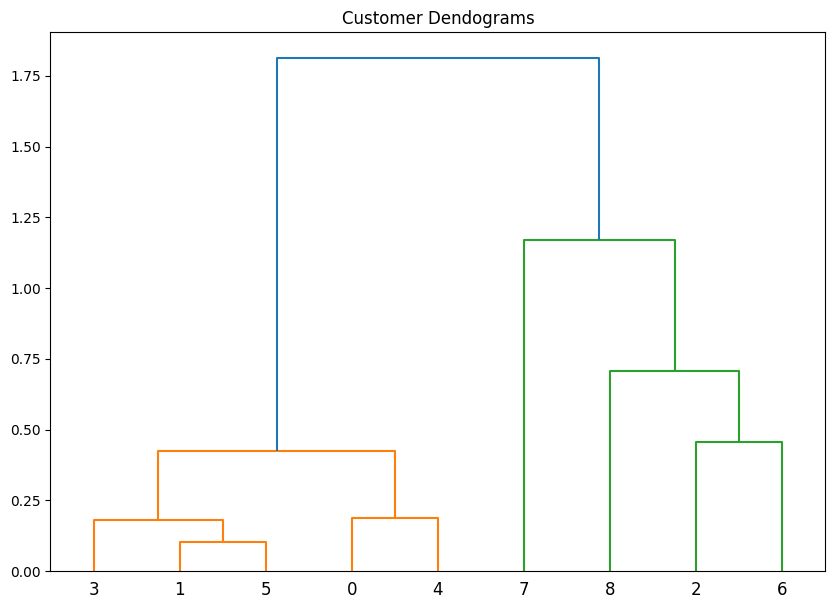

In [8]:
## answer of Q2b

"""plot the dendrogram"""

import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")

# We combine 2 steps as one.
dend = shc.dendrogram(shc.linkage(norm_stats, method='ward'))

## Q2c

Now apply agglomerative clustering algorithm on `stats` for `n_clusters=3`. How are the stocks grouped?

In [9]:
## answer of Q2c

# Import the AgglomerativeClustering module from the sklearn.cluster library
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
# n_clusters: Number of clusters to form
# affinity: Metric used to compute the linkage (distance between clusters), 'euclidean' in this case
# linkage: Criterion used to form clusters, 'ward' in this case

# Perform clustering on the data points and obtain cluster labels for each data point
cluster_labels = cluster.fit_predict(norm_stats)


/home/kin/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
for i in range(len(norm_stats)):
    norm_stats["label"] = cluster_labels

print(norm_stats)

           mean       std      skew  label
AAPL   0.245338  0.099790  0.868391      1
AMZN   0.011825  0.006409  0.730597      1
BRK-B  1.000000  0.424047  0.448660      0
GOOGL  0.000000  0.048821  0.626712      1
JNJ    0.156026  0.001942  1.000000      1
JPM    0.083254  0.000000  0.804722      1
MSFT   0.920690  0.241813  0.857916      0
TSLA   0.562683  1.000000  0.000000      2
V      0.490420  0.099266  0.335325      0


In [12]:
print(norm_stats.index)

Index(['AAPL', 'AMZN', 'BRK-B', 'GOOGL', 'JNJ', 'JPM', 'MSFT', 'TSLA', 'V'], dtype='object')


## Verifying clustering: returning distance with the snippet from assignment 2

In [14]:
# verify the cluster is correct:

# calculate the nearest data point and append the result to the dataframe
def appeend_nearest(df):
    # Initialize empty lists to store nearest rows and their distances
    nearest_rows = []
    nearest_distance = []

    # Iterate over each row in the DataFrame
    for i, row in df.iterrows():
        curr = row
        # Exclude the current row from the DataFrame
        rest = df.drop(i)
        # Dictionary to store Euclidean distances between the current row and others
        e_dists = {}
        # Iterate over the remaining rows to calculate Euclidean distances
        for j, contestant in rest.iterrows():
            # Calculate Euclidean distance using numpy's linalg.norm function
            e_dists.update({j: (np.linalg.norm(curr.values - contestant.values))})

        # Find the minimum Euclidean distance and corresponding row(s)
        min_dist = min(e_dists.values())
        nearest_row = [k for k, v in e_dists.items() if v == min_dist]  
        nearest_rows.append(','.join(nearest_row))  # Join list into a string
        nearest_distance.append(min_dist)

    # Add new columns to the DataFrame for nearest row(s) and their distances
    df['nearest_row'] = nearest_rows
    df['dist'] = nearest_distance
    
    return df

norm_stats = appeend_nearest(norm_stats)

print(norm_stats)


           mean       std      skew  label nearest_row      dist
AAPL   0.245338  0.099790  0.868391      1         JNJ  0.186740
AMZN   0.011825  0.006409  0.730597      1         JPM  0.103140
BRK-B  1.000000  0.424047  0.448660      0        MSFT  0.454961
GOOGL  0.000000  0.048821  0.626712      1        AMZN  0.112830
JNJ    0.156026  0.001942  1.000000      1        AAPL  0.186740
JPM    0.083254  0.000000  0.804722      1        AMZN  0.103140
MSFT   0.920690  0.241813  0.857916      0       BRK-B  0.454961
TSLA   0.562683  1.000000  0.000000      2       GOOGL  1.616825
V      0.490420  0.099266  0.335325      0       BRK-B  0.614816


which shows TSLA would be an outliner. 

## Trial 1 of 2: 3D plot

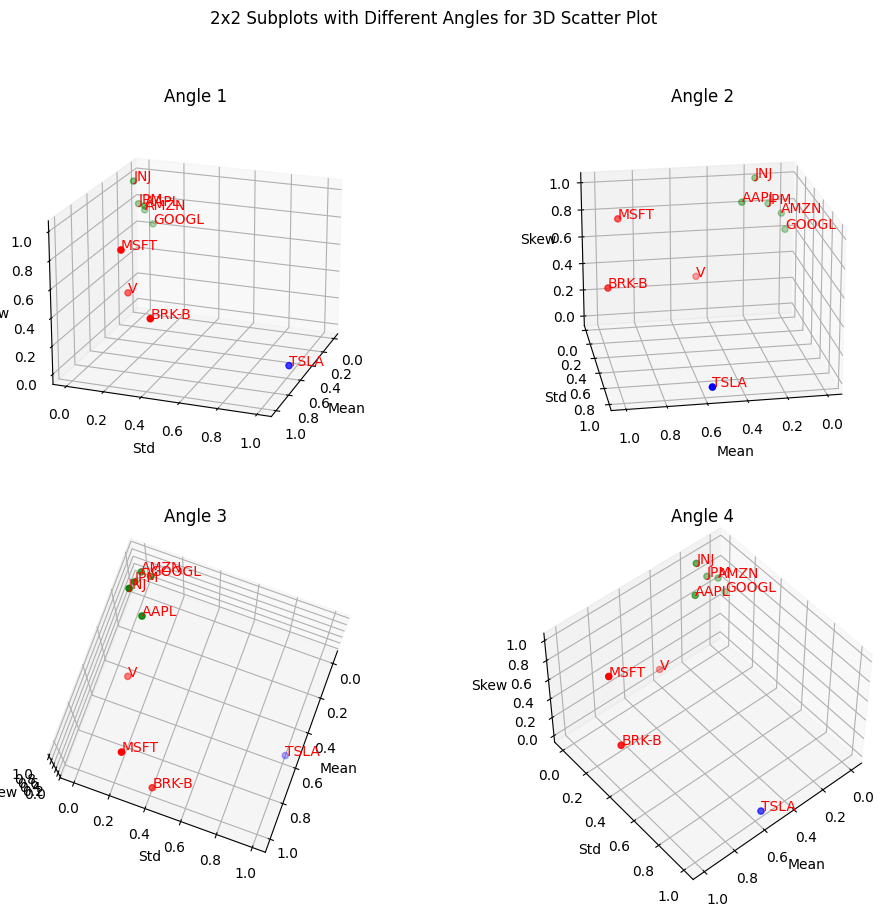

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Assuming you have your data loaded in 'norm_stats' DataFrame

# Create a 3D scatter plot
fig = plt.figure(figsize=(12, 10))

# Create subplots with different angles
ax1 = fig.add_subplot(2, 2, 1, projection='3d')
ax2 = fig.add_subplot(2, 2, 2, projection='3d')
ax3 = fig.add_subplot(2, 2, 3, projection='3d')
ax4 = fig.add_subplot(2, 2, 4, projection='3d')

# Define the colormap
colmap = {0: 'r', 1: 'g', 2: 'b'}

# Plot the data on each subplot with different angles
for ax in [ax1, ax2, ax3, ax4]:
    ax.scatter(norm_stats['mean'], norm_stats['std'], norm_stats['skew'], 
               c=norm_stats['label'].map(lambda x: colmap[x]), marker='o')
    
    # Iterate through DataFrame rows and set text labels for each point
    for index, row in norm_stats.iterrows():
        ax.text(row['mean'], row['std'], row['skew'], str(index), color='red')

    # Set labels for each axis
    ax.set_xlabel('Mean')
    ax.set_ylabel('Std')
    ax.set_zlabel('Skew')

# Set titles for each subplot
ax1.set_title('Angle 1')
ax1.view_init(elev=20, azim=20) 
ax2.set_title('Angle 2')
ax2.view_init(elev=20, azim=80) 
ax3.set_title('Angle 3')
ax3.view_init(elev=80, azim=20) 
ax4.set_title('Angle 4')
ax4.view_init(elev=50, azim=50) 

# Set the overall plot title
plt.suptitle('2x2 Subplots with Different Angles for 3D Scatter Plot')

# Show the plot
plt.show()


## Trial 2 of 2: 2D plots

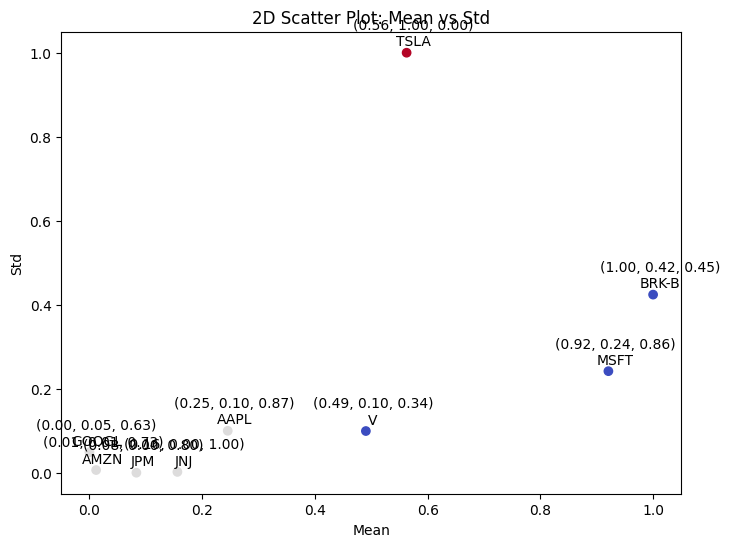

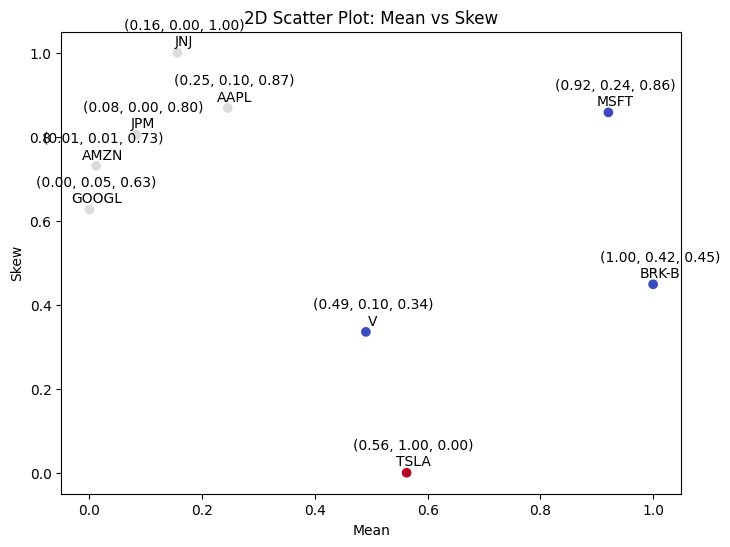

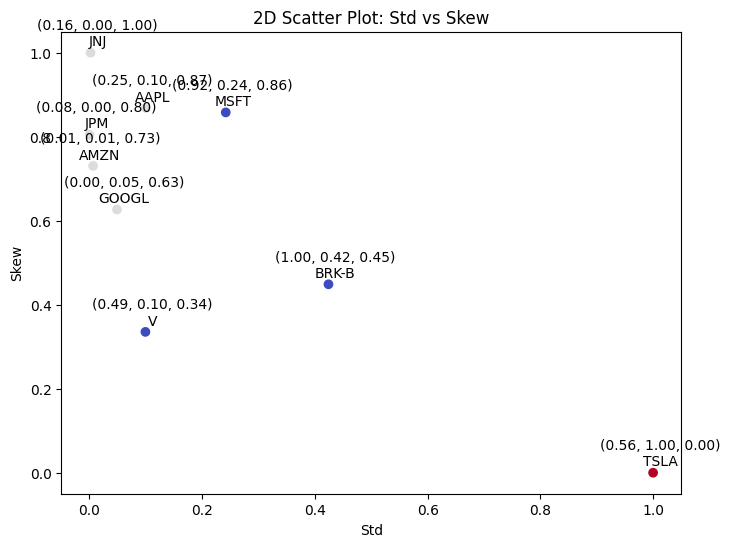

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming norm_stats is your DataFrame containing 'mean', 'std', 'skew' columns

# Create a 2D scatter plot for x-y relationship
plt.figure(figsize=(8, 6))
plt.scatter(norm_stats['mean'], norm_stats['std'], c=norm_stats['label'], cmap='coolwarm')

# Annotate dots with 'mean', 'std', 'skew', and index
for index, row in norm_stats.iterrows():
    plt.annotate(f"({row['mean']:.2f}, {row['std']:.2f}, {row['skew']:.2f})\n{index}", 
                 (row['mean'], row['std']), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')

plt.xlabel('Mean')
plt.ylabel('Std')
plt.title('2D Scatter Plot: Mean vs Std')
plt.show()

# Create a 2D scatter plot for x-z relationship
plt.figure(figsize=(8, 6))
plt.scatter(norm_stats['mean'], norm_stats['skew'], c=norm_stats['label'], cmap='coolwarm')

# Annotate dots with 'mean', 'std', 'skew', and index
for index, row in norm_stats.iterrows():
    plt.annotate(f"({row['mean']:.2f}, {row['std']:.2f}, {row['skew']:.2f})\n{index}", 
                 (row['mean'], row['skew']), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')

plt.xlabel('Mean')
plt.ylabel('Skew')
plt.title('2D Scatter Plot: Mean vs Skew')
plt.show()

# Create a 2D scatter plot for y-z relationship
plt.figure(figsize=(8, 6))
plt.scatter(norm_stats['std'], norm_stats['skew'], c=norm_stats['label'], cmap='coolwarm')

# Annotate dots with 'mean', 'std', 'skew', and index
for index, row in norm_stats.iterrows():
    plt.annotate(f"({row['mean']:.2f}, {row['std']:.2f}, {row['skew']:.2f})\n{index}", 
                 (row['std'], row['skew']), 
                 textcoords="offset points", 
                 xytext=(5,5), 
                 ha='center')

plt.xlabel('Std')
plt.ylabel('Skew')
plt.title('2D Scatter Plot: Std vs Skew')
plt.show()
